<div style="text-align: center; padding: 2em 1em; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); border-radius: 12px; color: white; margin-bottom: 2em;">
  <h1 style="margin: 0; font-size: 2.5em; font-weight: 600; letter-spacing: -0.02em;">Основы экспериментов</h1>
  <p style="margin: 0.5em 0 0 0; font-size: 1.2em; opacity: 0.95;">A/B‑тестирование, рандомизация, экспозиция, конфаундеры</p>
</div>

<div style="padding: 1.5em; background: #f8f9fa; border-left: 4px solid #667eea; border-radius: 6px; margin: 1em 0;">
  <p style="margin: 0; color: #2c3e50; line-height: 1.6; font-weight: 400;">
    <strong>Фундаментальные концепции:</strong> что такое A/B‑тест, зачем нужна рандомизация, 
    как работает экспозиция и как контролировать конфаундеры.
  </p>
</div>


<div style="padding: 1.5em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <h2 style="margin: 0 0 0.5em 0; color: #212529; font-size: 1.8em; font-weight: 600;">Подробное объяснение A/B‑тестирования</h2>
</div>

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <h3 style="margin: 0 0 0.5em 0; color: #212529; font-size: 1.3em; font-weight: 600;">1. Что такое «эффект лечения» (treatment effect)</h3>
</div>

**Treatment** (лечение) — это вмешательство, которое мы тестируем (новая кнопка, новый алгоритм и т.д.).

**Control** (контроль) — базовый вариант.

**Эффект лечения** — разница в поведении (метрике), вызванная внедрением treatment.

> **Пример**: конверсия в контроле 10%, в тесте 12% → эффект лечения = +2 п.п.

### 2. Потенциальные исходы: $Y_i(0)$ и $Y_i(1)$

По **Rubin Causal Model** для каждого объекта $i$ существуют два потенциальных исхода:

- $Y_i(0)$ — результат, если $i$ был бы в **контроле**.
- $Y_i(1)$ — результат, если $i$ был бы в **тесте**.

Оба значения потенциальные — в реальности мы можем наблюдать лишь один из них, потому что каждый пользователь получает либо контроль, либо тест.

**Пример:**

Рассмотрим пользователя $i$ в эксперименте по тестированию новой кнопки "Купить". 

- $Y_i(0)$ — это потенциальный исход, если пользователь $i$ увидел бы **старую кнопку** (контроль). Например:
  - $Y_i(0) = 1$, если пользователь $i$ купил бы товар со старой кнопкой
  - $Y_i(0) = 0$, если пользователь $i$ не купил бы товар со старой кнопкой
  - Или $Y_i(0) = 1500$ рублей — сумма покупки, которую сделал бы пользователь $i$ со старой кнопкой

- $Y_i(1)$ — это потенциальный исход, если пользователь $i$ увидел бы **новую кнопку** (тест). Например:
  - $Y_i(1) = 1$, если пользователь $i$ купил бы товар с новой кнопкой
  - $Y_i(1) = 0$, если пользователь $i$ не купил бы товар с новой кнопкой
  - Или $Y_i(1) = 2000$ рублей — сумма покупки, которую сделал бы пользователь $i$ с новой кнопкой

**Важно**: мы никогда не увидим оба значения одновременно. Если пользователь $i$ попал в контроль ($T_i = 0$), мы наблюдаем только $Y_i(0)$. Если попал в тест ($T_i = 1$), мы наблюдаем только $Y_i(1)$.

### 3. Наблюдаемый исход

**Формула наблюдаемого исхода:**

$$Y_i = Y_i(0) \cdot (1 - T_i) + Y_i(1) \cdot T_i$$

где:
- $Y_i$ — фактически наблюдаемый результат;
- $T_i \in \{0,1\}$ — индикатор назначения (0 = контроль, 1 = тест).

Если $T_i=0$, то $Y_i = Y_i(0)$. Если $T_i=1$, то $Y_i = Y_i(1)$.

### 4. Индивидуальный эффект лечения

$$\tau_i = Y_i(1) - Y_i(0)$$

Это истинный причинный эффект для конкретного индивида $i$. Его нельзя вычислить напрямую, так как мы не видим оба альтернативных исхода одновременно.

### 5. Средний эффект лечения (ATE)

**Определение ATE:**

$$ATE = \mathbb{E}[Y(1) - Y(0)]$$

Это средний по популяции эффект — то, что происходит в среднем, если бы всех подставить в тест вместо контроля.

### 6. Почему ATE можно оценить разностью средних

Ключевое допущение — **рандомизация**:

$$T_i \perp\!\!\!\perp (Y_i(0), Y_i(1))$$

То есть назначение в тест/контроль независимо от потенциальных исходов. При этом:

$$\mathbb{E}[Y(1)] = \mathbb{E}[Y \mid T=1],\qquad \mathbb{E}[Y(0)] = \mathbb{E}[Y \mid T=0]$$

Тогда:

$$ATE = \mathbb{E}[Y \mid T=1] - \mathbb{E}[Y \mid T=0]$$

### 7. Оценка ATE по выборке

**Оценка — разность средних:**

$$\hat{ATE} = \bar{Y}_1 - \bar{Y}_0 = \frac{1}{n_1}\sum_{i: T_i=1} Y_i - \frac{1}{n_0}\sum_{i: T_i=0} Y_i$$

где $n_1$ и $n_0$ — размеры тестовой и контрольной групп.

Это несмещённая оценка ATE при корректной рандомизации.

### 8. Короткое резюме — интуиция

- У каждого объекта два потенциальных будущих — контроль и тест.
- Мы наблюдаем только один.
- Рандомизация делает группы сопоставимыми, поэтому разность средних даёт причинный эффект.
- Индивидуальные эффекты $\tau_i$ невычислимы в прямом виде; мы работаем со средним эффектом.

### 9. Что можно добавить дальше (опции)

- Формулы для **доверительного интервала** и **p-value** для $\hat{ATE}$.
- Разбор **SUTVA**, **перекрёстных эффектов** и **несовместимости назначений**.
- Примеры вычисления ATE в Python (pandas/statsmodels).


## 1. Что такое A/B‑тестирование

### 1.1 Определение

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <p style="margin: 0; color: #212529; line-height: 1.7;">
    <strong>A/B‑тестирование</strong> (или <strong>контролируемый эксперимент</strong>) — это метод сравнения двух или более вариантов 
    (вариантов A, B, ...) для оценки причинно‑следственного эффекта вмешательства (treatment) на интересующую метрику.
  </p>
</div>

**Ключевые компоненты:**

1. **Контрольная группа (Control, группа A)**: получает базовый вариант (baseline)
2. **Тестовая группа (Treatment, группа B)**: получает новый вариант
3. **Рандомизация**: случайное распределение единиц наблюдения по группам
4. **Метрика**: измеряемый результат (конверсия, выручка, время на сайте и т.д.)

### 1.2 Математическая формализация

Пусть $Y_i$ — исход (outcome) для единицы $i$, $T_i \in \{0, 1\}$ — индикатор лечения 
(0 = контроль, 1 = тест). Тогда:

$$Y_i = Y_i(0) \cdot (1 - T_i) + Y_i(1) \cdot T_i$$

где:
- $Y_i(0)$ — потенциальный исход при $T_i = 0$ (контроль)
- $Y_i(1)$ — потенциальный исход при $T_i = 1$ (тест)

**Средний эффект лечения (Average Treatment Effect, ATE):**

$$\text{ATE} = \mathbb{E}[Y_i(1) - Y_i(0)] = \mathbb{E}[Y_i | T_i = 1] - \mathbb{E}[Y_i | T_i = 0]$$

При правильной рандомизации оценка ATE:

$$\hat{\text{ATE}} = \bar{Y}_1 - \bar{Y}_0 = \frac{1}{n_1}\sum_{i: T_i=1} Y_i - \frac{1}{n_0}\sum_{i: T_i=0} Y_i$$

где $\bar{Y}_1$ и $\bar{Y}_0$ — выборочные средние в тестовой и контрольной группах.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Tuple

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Для воспроизводимости
np.random.seed(42)


### Пример 1: Симуляция A/B‑теста

**Цель симуляции:**

Симуляция данных помогает понять, как выглядят данные A/B‑теста до применения статистических проверок. Мы моделируем бинарные исходы (конверсии), чтобы:
- Понять структуру данных эксперимента
- Увидеть, как работает рандомизация на практике
- Визуализировать разброс в данных из‑за случайности
- Продемонстрировать концепцию потенциальных исходов $Y_i(0)$ и $Y_i(1)$

**Описание эксперимента:**

В этом примере мы симулируем A/B‑тест для проверки новой кнопки "Купить":
- **Контрольная группа**: пользователи видят старую кнопку с истинной конверсией $p_0 = 0.10$ (10%)
- **Тестовая группа**: пользователи видят новую кнопку с истинной конверсией $p_1 = 0.12$ (12%)
- **Истинный эффект**: $\text{ATE} = p_1 - p_0 = 0.02$ (2 процентных пункта или 20% относительного lift)

**Как работает симуляция:**

1. Каждый пользователь — отдельная строка в данных
2. Исход бинарный: $Y_i \in \{0, 1\}$ (0 = не конвертировался, 1 = конвертировался)
3. Данные генерируются через биномиальное распределение: для каждого пользователя $i$ исход моделируется как $Y_i \sim \text{Bernoulli}(p)$, где $p$ зависит от группы
4. Рандомизация идеальная: пользователи случайно распределяются между группами

**Теоретическая основа: биномиальное распределение**

Бинарный исход для одного пользователя моделируется распределением Бернулли:

$$Y_i \sim \text{Bernoulli}(p)$$

где $P(Y_i = 1) = p$ и $P(Y_i = 0) = 1 - p$.

Количество успехов (конверсий) в группе из $n$ пользователей следует биномиальному распределению:

$$k \sim \text{Binomial}(n, p)$$

где вероятность получить ровно $k$ успехов:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$$

**Параметры симуляции:**

- `n_control`: размер контрольной группы (по умолчанию 1000)
- `n_treatment`: размер тестовой группы (по умолчанию 1000)
- `control_mean`: истинная вероятность конверсии в контроле (по умолчанию 0.10)
- `treatment_mean`: истинная вероятность конверсии в тесте (по умолчанию 0.12)
- `random_seed`: seed для воспроизводимости результатов (по умолчанию 42)


In [23]:
# Параметры симуляции
n_control = 1000          # Размер контрольной группы
n_treatment = 1000        # Размер тестовой группы
control_mean = 0.10       # Истинная конверсия в контроле (10%)
treatment_mean = 0.12      # Истинная конверсия в тесте (12%)
random_seed = 42          # Seed для воспроизводимости

def simulate_ab_test(
    n_control: int = 1000,
    n_treatment: int = 1000,
    control_mean: float = 0.10,
    treatment_mean: float = 0.12,
    random_seed: int = 42
) -> pd.DataFrame:
    """
    Симулирует данные A/B теста с бинарным исходом (конверсия).
    
    Каждый пользователь получает бинарный исход (0 или 1) согласно распределению Бернулли
    с вероятностью, зависящей от группы.
    
    Parameters:
    -----------
    n_control : int
        Размер контрольной группы
    n_treatment : int
        Размер тестовой группы
    control_mean : float
        Истинная вероятность конверсии в контрольной группе
    treatment_mean : float
        Истинная вероятность конверсии в тестовой группе
    random_seed : int
        Seed для воспроизводимости
        
    Returns:
    --------
    pd.DataFrame
        DataFrame с колонками: user_id, group, converted
    """
    np.random.seed(random_seed)
    
    # Генерируем данные для контрольной группы
    # Каждый пользователь: Y_i ~ Bernoulli(p_control)
    control_data = pd.DataFrame({
        'user_id': range(n_control),
        'group': 'control',
        'converted': np.random.binomial(1, control_mean, n_control)  # Бернулли = Binomial(1, p)
    })
    
    # Генерируем данные для тестовой группы
    # Каждый пользователь: Y_i ~ Bernoulli(p_treatment)
    treatment_data = pd.DataFrame({
        'user_id': range(n_control, n_control + n_treatment),
        'group': 'treatment',
        'converted': np.random.binomial(1, treatment_mean, n_treatment)
    })
    
    return pd.concat([control_data, treatment_data], ignore_index=True)

# Симулируем данные
data = simulate_ab_test(
    n_control=n_control,
    n_treatment=n_treatment,
    control_mean=control_mean,
    treatment_mean=treatment_mean,
    random_seed=random_seed
)

# Вычисляем статистики по группам
control_group = data[data['group'] == 'control']
treatment_group = data[data['group'] == 'treatment']

# Количество конверсий в каждой группе
control_conversions = control_group['converted'].sum()
treatment_conversions = treatment_group['converted'].sum()

# Выборочные конверсии (оценки)
observed_control_mean = control_group['converted'].mean()
observed_treatment_mean = treatment_group['converted'].mean()

# Оценка ATE
ate = observed_treatment_mean - observed_control_mean

# Относительный lift
relative_lift = (ate / observed_control_mean) * 100 if observed_control_mean > 0 else 0

# Улучшенный отчёт
print("=" * 70)
print("РЕЗУЛЬТАТЫ A/B ТЕСТА")
print("=" * 70)
print(f"\nПараметры симуляции:")
print(f"  Контрольная группа: n = {n_control}, истинная конверсия = {control_mean:.1%}")
print(f"  Тестовая группа: n = {n_treatment}, истинная конверсия = {treatment_mean:.1%}")
print(f"  Истинный ATE = {treatment_mean - control_mean:.4f} ({treatment_mean - control_mean:.1%})")

print(f"\nНаблюдаемые результаты:")
print(f"  Контрольная группа (n={len(control_group)}):")
print(f"    Конверсий: {control_conversions}")
print(f"    Конверсия: {observed_control_mean:.4f} ({observed_control_mean:.2%})")
print(f"  Тестовая группа (n={len(treatment_group)}):")
print(f"    Конверсий: {treatment_conversions}")
print(f"    Конверсия: {observed_treatment_mean:.4f} ({observed_treatment_mean:.2%})")

print(f"\nОценка эффекта:")
print(f"  ATE (абсолютная разница): {ate:.4f} ({ate:.2%})")
print(f"  Относительный lift: {relative_lift:.2f}%")
print("=" * 70)


РЕЗУЛЬТАТЫ A/B ТЕСТА

Параметры симуляции:
  Контрольная группа: n = 1000, истинная конверсия = 10.0%
  Тестовая группа: n = 1000, истинная конверсия = 12.0%
  Истинный ATE = 0.0200 (2.0%)

Наблюдаемые результаты:
  Контрольная группа (n=1000):
    Конверсий: 100
    Конверсия: 0.1000 (10.00%)
  Тестовая группа (n=1000):
    Конверсий: 112
    Конверсия: 0.1120 (11.20%)

Оценка эффекта:
  ATE (абсолютная разница): 0.0120 (1.20%)
  Относительный lift: 12.00%


### Визуализация результатов симуляции


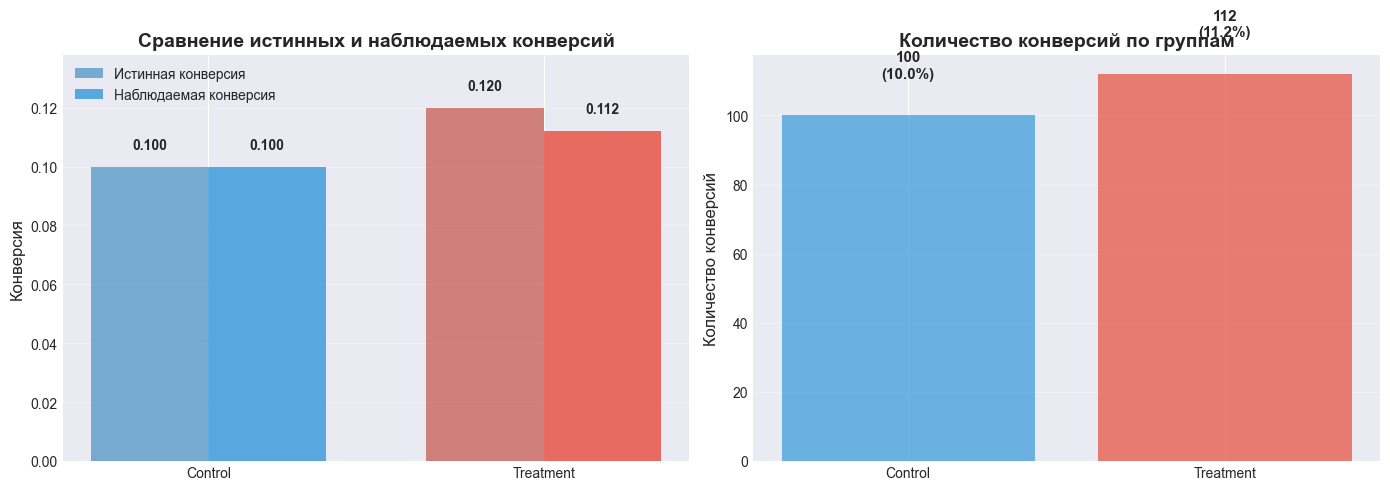

In [24]:
# Визуализация результатов симуляции
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Bar chart с конверсиями в каждой группе
groups = ['Control', 'Treatment']
conversions = [observed_control_mean, observed_treatment_mean]
true_conversions = [control_mean, treatment_mean]

x_pos = np.arange(len(groups))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, true_conversions, width, 
                   label='Истинная конверсия', color=['#2980b9', '#c0392b'], alpha=0.6)
bars2 = axes[0].bar(x_pos + width/2, conversions, width, 
                   label='Наблюдаемая конверсия', color=['#3498db', '#e74c3c'], alpha=0.8)

# Добавляем значения на столбцы
for i, (true_val, obs_val) in enumerate(zip(true_conversions, conversions)):
    axes[0].text(i - width/2, true_val + 0.005, f'{true_val:.3f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    axes[0].text(i + width/2, obs_val + 0.005, f'{obs_val:.3f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

axes[0].set_ylabel('Конверсия', fontsize=12)
axes[0].set_title('Сравнение истинных и наблюдаемых конверсий', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(groups)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, max(max(true_conversions), max(conversions)) * 1.15])

# График 2: Bar chart с количеством конверсий
conversion_counts = [control_conversions, treatment_conversions]
total_users = [len(control_group), len(treatment_group)]

bars = axes[1].bar(groups, conversion_counts, color=['#3498db', '#e74c3c'], alpha=0.7)

# Добавляем значения и проценты на столбцы
for i, (count, total) in enumerate(zip(conversion_counts, total_users)):
    height = bars[i].get_height()
    axes[1].text(i, height + total * 0.01, 
                f'{int(count)}\n({count/total:.1%})',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

axes[1].set_ylabel('Количество конверсий', fontsize=12)
axes[1].set_title('Количество конверсий по группам', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Почему наблюдаемое значение отличается от ожидаемого?

**Важный момент**: В тестовой группе мы получили 112 конверсий вместо ожидаемых 120. Это **нормально** и объясняется случайностью в биномиальном распределении.

**Объяснение:**

- **Ожидаемое значение (mean)**: $\mathbb{E}[X] = n \cdot p = 1000 \cdot 0.12 = 120$ конверсий
- **Фактическое значение**: случайная величина $X \sim \text{Binomial}(n=1000, p=0.12)$
- **Стандартное отклонение**: $\sigma = \sqrt{n \cdot p \cdot (1-p)} = \sqrt{1000 \cdot 0.12 \cdot 0.88} \approx 10.3$

Это означает, что:
- Ожидаемое значение = 120 конверсий
- Но фактическое значение может быть в диапазоне примерно $120 \pm 20$ (в пределах 2 стандартных отклонений)
- Полученные 112 конверсий находятся в пределах нормального разброса

**Интуиция**: Даже если истинная конверсия 12%, в конкретной выборке из 1000 пользователей мы можем получить и 110, и 115, и 125 конверсий — это нормальная случайная вариация. При увеличении размера выборки относительный разброс уменьшается.


### Визуализация биномиального распределения

**Что мы делаем:**

В этой ячейке мы **не проводим много экспериментов**. Вместо этого мы используем **теоретическое биномиальное распределение**, чтобы показать, какие результаты возможны при заданных параметрах.

**Как это работает:**

Мы вычисляем вероятности для всех возможных исходов по формуле биномиального распределения:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

где:
- $n$ — размер группы (1000 пользователей)
- $p$ — истинная вероятность конверсии (0.10 для контроля, 0.12 для теста)
- $k$ — количество конверсий (может быть от 0 до 1000)

**Что показывает график:**

График показывает **распределение вероятностей** для всех возможных значений количества конверсий. Например:
- Вероятность получить ровно 120 конверсий: $P(X = 120) \approx 0.039$
- Вероятность получить 112 конверсий: $P(X = 112) \approx 0.025$
- Вероятность получить 130 конверсий: $P(X = 130) \approx 0.001$

**Зачем это нужно:**

Это визуализация показывает, что даже при фиксированной истинной конверсии (например, 12%) конкретное количество конверсий в выборке из 1000 пользователей может варьироваться из-за случайности. График показывает все возможные исходы и их вероятности, что помогает понять:
- Почему наблюдаемое значение может отличаться от ожидаемого
- Какие значения находятся в пределах нормального разброса (±1σ, ±2σ)
- Как выглядит распределение вероятностей для биномиального процесса

**Разница с симуляцией:**

- **Симуляция**: проводим много экспериментов и смотрим, что получается эмпирически
- **Теоретическое распределение**: вычисляем по формуле, что должно получаться в среднем

Оба подхода дают похожий результат, но теоретическое распределение более точное и не требует множества симуляций.


ОБЪЯСНЕНИЕ РАЗБРОСА В НАБЛЮДАЕМЫХ ЗНАЧЕНИЯХ

Параметры биномиального распределения для тестовой группы:
  n = 1000 (размер группы)
  p = 12.00% (истинная вероятность конверсии)

Ожидаемое значение (mean):
  E[X] = n × p = 1000 × 0.12 = 120 конверсий

Стандартное отклонение:
  σ = √(n × p × (1-p)) = √(1000 × 0.12 × 0.88)
  σ = 10.28 конверсий

Наблюдаемое значение в нашей симуляции:
  X = 112 конверсий

Отклонение от ожидаемого:
  Отклонение = 112 - 120.0 = -8 конверсий
  В единицах стандартного отклонения: -0.78σ

Интерпретация:
  ✓ Отклонение в пределах одного стандартного отклонения — это нормально!

Примерный диапазон (95% случаев):
  [99, 141] конверсий


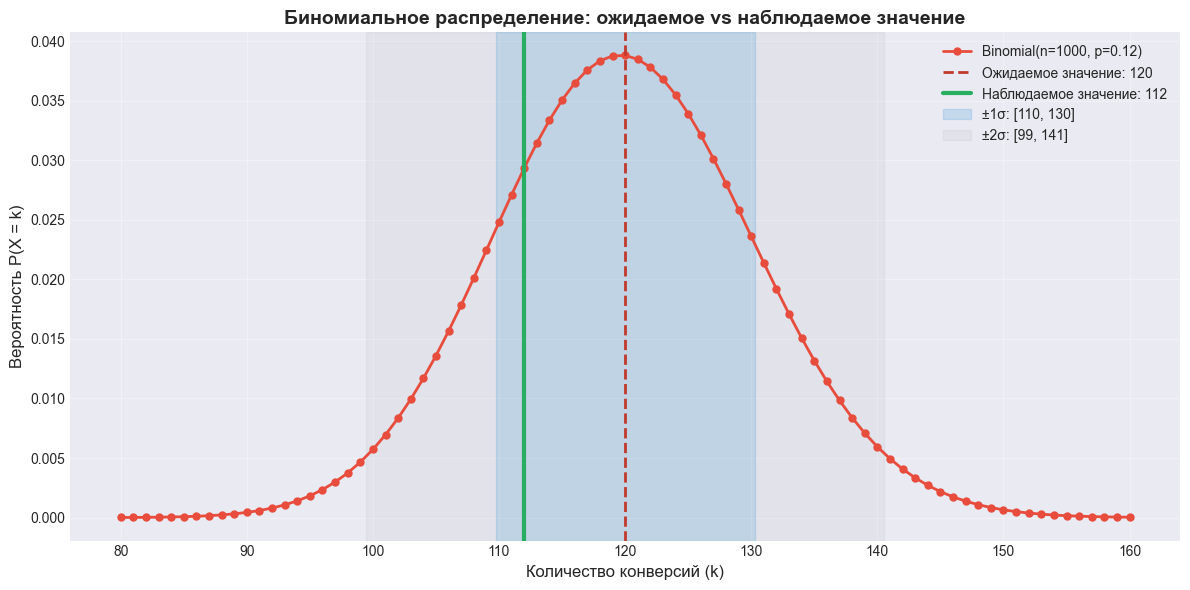

In [25]:
# Демонстрация: почему наблюдаемое значение отличается от ожидаемого

# Вычисляем стандартное отклонение для тестовой группы
n_treatment = 1000
p_treatment = 0.12
expected_conversions = n_treatment * p_treatment
std_conversions = np.sqrt(n_treatment * p_treatment * (1 - p_treatment))

print("=" * 70)
print("ОБЪЯСНЕНИЕ РАЗБРОСА В НАБЛЮДАЕМЫХ ЗНАЧЕНИЯХ")
print("=" * 70)
print(f"\nПараметры биномиального распределения для тестовой группы:")
print(f"  n = {n_treatment} (размер группы)")
print(f"  p = {p_treatment:.2%} (истинная вероятность конверсии)")
print(f"\nОжидаемое значение (mean):")
print(f"  E[X] = n × p = {n_treatment} × {p_treatment} = {expected_conversions:.0f} конверсий")
print(f"\nСтандартное отклонение:")
print(f"  σ = √(n × p × (1-p)) = √({n_treatment} × {p_treatment} × {1-p_treatment:.2f})")
print(f"  σ = {std_conversions:.2f} конверсий")
print(f"\nНаблюдаемое значение в нашей симуляции:")
print(f"  X = {treatment_conversions} конверсий")
print(f"\nОтклонение от ожидаемого:")
deviation = treatment_conversions - expected_conversions
print(f"  Отклонение = {treatment_conversions} - {expected_conversions} = {deviation:.0f} конверсий")
print(f"  В единицах стандартного отклонения: {deviation/std_conversions:.2f}σ")
print(f"\nИнтерпретация:")
if abs(deviation) <= std_conversions:
    print(f"  ✓ Отклонение в пределах одного стандартного отклонения — это нормально!")
elif abs(deviation) <= 2 * std_conversions:
    print(f"  ✓ Отклонение в пределах двух стандартных отклонений — это нормально!")
else:
    print(f"  ⚠ Отклонение больше двух стандартных отклонений — редко, но возможно")
print(f"\nПримерный диапазон (95% случаев):")
print(f"  [{expected_conversions - 2*std_conversions:.0f}, {expected_conversions + 2*std_conversions:.0f}] конверсий")
print("=" * 70)

# Визуализация: показываем, где находится наше наблюдение
from scipy.stats import binom

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Биномиальное распределение
k_values = np.arange(80, 161)  # Диапазон вокруг ожидаемого значения
prob = binom.pmf(k_values, n_treatment, p_treatment)

ax.plot(k_values, prob, 'o-', color='#e74c3c', linewidth=2, markersize=5, 
        label=f'Binomial(n={n_treatment}, p={p_treatment:.2f})')

# Ожидаемое значение
ax.axvline(expected_conversions, color='#c0392b', linestyle='--', linewidth=2, 
          label=f'Ожидаемое значение: {expected_conversions:.0f}')

# Наблюдаемое значение
ax.axvline(treatment_conversions, color='#27ae60', linestyle='-', linewidth=3, 
          label=f'Наблюдаемое значение: {treatment_conversions}')

# Диапазон ±1σ
ax.axvspan(expected_conversions - std_conversions, expected_conversions + std_conversions, 
          alpha=0.2, color='#3498db', label=f'±1σ: [{expected_conversions - std_conversions:.0f}, {expected_conversions + std_conversions:.0f}]')

# Диапазон ±2σ
ax.axvspan(expected_conversions - 2*std_conversions, expected_conversions + 2*std_conversions, 
          alpha=0.1, color='#95a5a6', label=f'±2σ: [{expected_conversions - 2*std_conversions:.0f}, {expected_conversions + 2*std_conversions:.0f}]')

ax.set_xlabel('Количество конверсий (k)', fontsize=12)
ax.set_ylabel('Вероятность P(X = k)', fontsize=12)
ax.set_title('Биномиальное распределение: ожидаемое vs наблюдаемое значение', 
            fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Что происходит в этой ячейке:**

Мы визуализируем **теоретическое биномиальное распределение** для количества конверсий. Используя формулу $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$, мы вычисляем вероятности всех возможных исходов и показываем их на графике. Это помогает понять, какие результаты возможны при заданных параметрах и почему наблюдаемые значения могут отличаться от ожидаемых.

**На графике показаны:**
- Распределение вероятностей для контрольной и тестовой групп
- Ожидаемые значения (средние)
- **Доверительные интервалы** (±1σ и ±2σ), которые показывают диапазоны, в которые попадают ~68% и ~95% всех возможных результатов


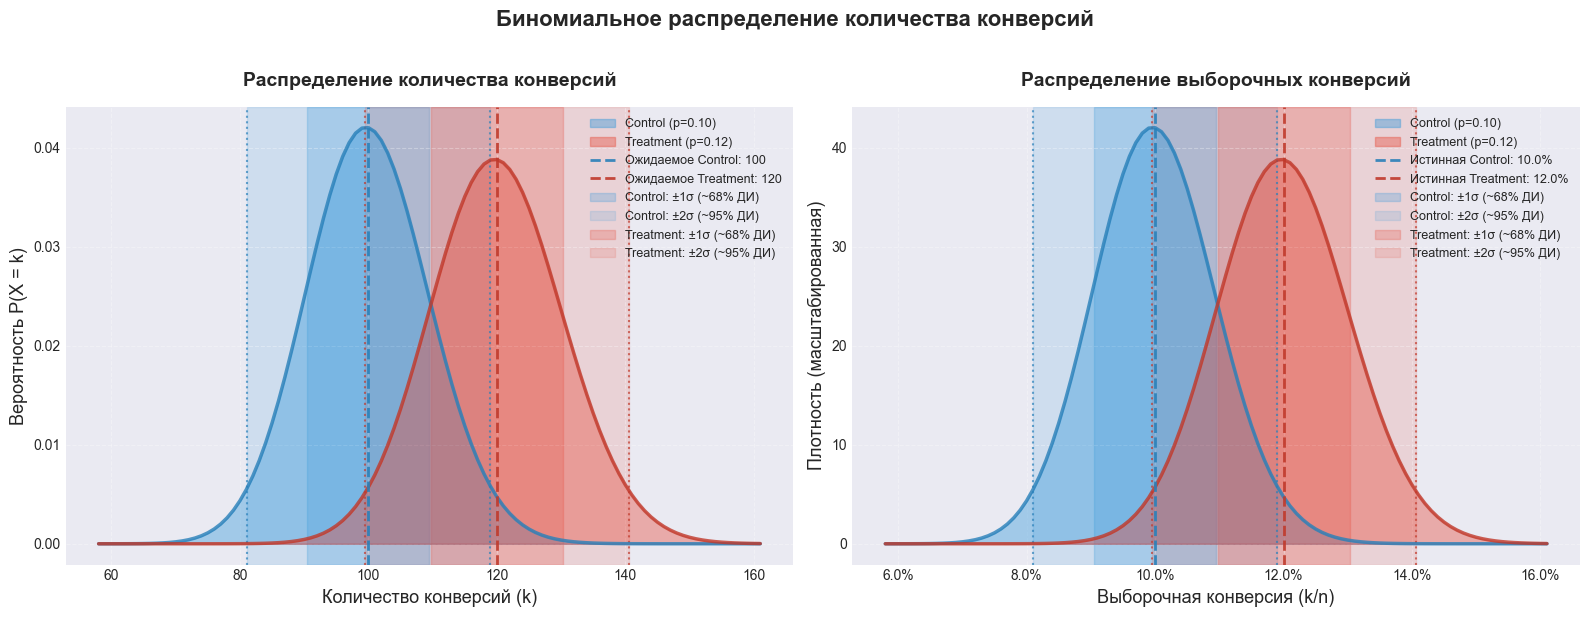

СТАТИСТИКИ БИНОМИАЛЬНОГО РАСПРЕДЕЛЕНИЯ

Ожидаемое количество конверсий (mean):
  Control:   100 конверсий (из 1000 пользователей)
  Treatment: 120 конверсий (из 1000 пользователей)

Стандартное отклонение (σ):
  Control:   σ = 9.49 конверсий
  Treatment: σ = 10.28 конверсий

Диапазон ±2σ (примерно 95% случаев):
  Control:   [81, 119] конверсий
  Treatment: [99, 141] конверсий


In [27]:
# Визуализация биномиального распределения (улучшенная версия)
from scipy.stats import binom
from matplotlib.ticker import PercentFormatter

# Параметры для биномиального распределения
n = n_control  # Размер группы

# Ограничиваем диапазон для лучшей визуализации (центрируем вокруг ожидаемых значений)
expected_control = int(n * control_mean)
expected_treatment = int(n * treatment_mean)
std_control = np.sqrt(n * control_mean * (1 - control_mean))
std_treatment = np.sqrt(n * treatment_mean * (1 - treatment_mean))

# Диапазон значений для визуализации (±4 стандартных отклонения)
k_min = max(0, int(min(expected_control, expected_treatment) - 4 * max(std_control, std_treatment)))
k_max = min(n, int(max(expected_control, expected_treatment) + 4 * max(std_control, std_treatment)))
k_values = np.arange(k_min, k_max + 1)

# Вероятности для контрольной и тестовой групп
prob_control = binom.pmf(k_values, n, control_mean)
prob_treatment = binom.pmf(k_values, n, treatment_mean)

# Создаём график с улучшенным стилем
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Биномиальное распределение количества конверсий', fontsize=16, fontweight='bold', y=1.02)

# График 1: Распределение количества конверсий
# Используем fill_between для более наглядной визуализации
axes[0].fill_between(k_values, 0, prob_control, alpha=0.4, color='#3498db', 
                     label=f'Control (p={control_mean:.2f})')
axes[0].fill_between(k_values, 0, prob_treatment, alpha=0.4, color='#e74c3c', 
                     label=f'Treatment (p={treatment_mean:.2f})')

# Линии распределения
axes[0].plot(k_values, prob_control, color='#2980b9', linewidth=2.5, alpha=0.8)
axes[0].plot(k_values, prob_treatment, color='#c0392b', linewidth=2.5, alpha=0.8)

# Вертикальные линии для ожидаемых значений
axes[0].axvline(expected_control, color='#2980b9', linestyle='--', linewidth=2, 
                alpha=0.9, label=f'Ожидаемое Control: {expected_control}')
axes[0].axvline(expected_treatment, color='#c0392b', linestyle='--', linewidth=2, 
                alpha=0.9, label=f'Ожидаемое Treatment: {expected_treatment}')

# Доверительные интервалы для контрольной группы (±1σ и ±2σ)
axes[0].axvspan(expected_control - std_control, expected_control + std_control, 
               alpha=0.25, color='#3498db', zorder=0, label='Control: ±1σ (~68% ДИ)')
axes[0].axvspan(expected_control - 2*std_control, expected_control + 2*std_control, 
               alpha=0.15, color='#3498db', zorder=0, label='Control: ±2σ (~95% ДИ)')
# Вертикальные линии для границ 95% ДИ (контроль)
axes[0].axvline(expected_control - 2*std_control, color='#2980b9', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
axes[0].axvline(expected_control + 2*std_control, color='#2980b9', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)

# Доверительные интервалы для тестовой группы (±1σ и ±2σ)
axes[0].axvspan(expected_treatment - std_treatment, expected_treatment + std_treatment, 
               alpha=0.25, color='#e74c3c', zorder=0, label='Treatment: ±1σ (~68% ДИ)')
axes[0].axvspan(expected_treatment - 2*std_treatment, expected_treatment + 2*std_treatment, 
               alpha=0.15, color='#e74c3c', zorder=0, label='Treatment: ±2σ (~95% ДИ)')
# Вертикальные линии для границ 95% ДИ (тест)
axes[0].axvline(expected_treatment - 2*std_treatment, color='#c0392b', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
axes[0].axvline(expected_treatment + 2*std_treatment, color='#c0392b', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)

axes[0].set_xlabel('Количество конверсий (k)', fontsize=13, fontweight='500')
axes[0].set_ylabel('Вероятность P(X = k)', fontsize=13, fontweight='500')
axes[0].set_title('Распределение количества конверсий', fontsize=14, fontweight='bold', pad=15)
axes[0].legend(loc='upper right', fontsize=9, framealpha=0.95, ncol=1)
axes[0].grid(alpha=0.3, linestyle='--', linewidth=0.8)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# График 2: Распределение выборочных конверсий (k/n)
conversion_values = k_values / n
# Масштабируем для лучшей визуализации плотности
density_control = prob_control * n
density_treatment = prob_treatment * n

axes[1].fill_between(conversion_values, 0, density_control, alpha=0.4, color='#3498db',
                     label=f'Control (p={control_mean:.2f})')
axes[1].fill_between(conversion_values, 0, density_treatment, alpha=0.4, color='#e74c3c',
                     label=f'Treatment (p={treatment_mean:.2f})')

# Линии распределения
axes[1].plot(conversion_values, density_control, color='#2980b9', linewidth=2.5, alpha=0.8)
axes[1].plot(conversion_values, density_treatment, color='#c0392b', linewidth=2.5, alpha=0.8)

# Вертикальные линии для истинных конверсий
axes[1].axvline(control_mean, color='#2980b9', linestyle='--', linewidth=2, 
                alpha=0.9, label=f'Истинная Control: {control_mean:.1%}')
axes[1].axvline(treatment_mean, color='#c0392b', linestyle='--', linewidth=2, 
                alpha=0.9, label=f'Истинная Treatment: {treatment_mean:.1%}')

# Доверительные интервалы для контрольной группы (±1σ и ±2σ)
axes[1].axvspan(control_mean - std_control/n, control_mean + std_control/n, 
               alpha=0.25, color='#3498db', zorder=0, label='Control: ±1σ (~68% ДИ)')
axes[1].axvspan(control_mean - 2*std_control/n, control_mean + 2*std_control/n, 
               alpha=0.15, color='#3498db', zorder=0, label='Control: ±2σ (~95% ДИ)')
# Вертикальные линии для границ 95% ДИ (контроль)
axes[1].axvline(control_mean - 2*std_control/n, color='#2980b9', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
axes[1].axvline(control_mean + 2*std_control/n, color='#2980b9', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
# Доверительные интервалы для тестовой группы (±1σ и ±2σ)
axes[1].axvspan(treatment_mean - std_treatment/n, treatment_mean + std_treatment/n, 
               alpha=0.25, color='#e74c3c', zorder=0, label='Treatment: ±1σ (~68% ДИ)')
axes[1].axvspan(treatment_mean - 2*std_treatment/n, treatment_mean + 2*std_treatment/n, 
               alpha=0.15, color='#e74c3c', zorder=0, label='Treatment: ±2σ (~95% ДИ)')
# Вертикальные линии для границ 95% ДИ (тест)
axes[1].axvline(treatment_mean - 2*std_treatment/n, color='#c0392b', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)
axes[1].axvline(treatment_mean + 2*std_treatment/n, color='#c0392b', linestyle=':', linewidth=1.5, alpha=0.7, zorder=1)

axes[1].set_xlabel('Выборочная конверсия (k/n)', fontsize=13, fontweight='500')
axes[1].set_ylabel('Плотность (масштабированная)', fontsize=13, fontweight='500')
axes[1].set_title('Распределение выборочных конверсий', fontsize=14, fontweight='bold', pad=15)
axes[1].legend(loc='upper right', fontsize=9, framealpha=0.95, ncol=1)
axes[1].grid(alpha=0.3, linestyle='--', linewidth=0.8)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Форматирование осей для процентов
axes[1].xaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

# Улучшенный текстовый вывод
print("=" * 70)
print("СТАТИСТИКИ БИНОМИАЛЬНОГО РАСПРЕДЕЛЕНИЯ")
print("=" * 70)
print(f"\nОжидаемое количество конверсий (mean):")
print(f"  Control:   {expected_control:.0f} конверсий (из {n} пользователей)")
print(f"  Treatment: {expected_treatment:.0f} конверсий (из {n} пользователей)")
print(f"\nСтандартное отклонение (σ):")
print(f"  Control:   σ = {std_control:.2f} конверсий")
print(f"  Treatment: σ = {std_treatment:.2f} конверсий")
print(f"\nДиапазон ±2σ (примерно 95% случаев):")
print(f"  Control:   [{expected_control - 2*std_control:.0f}, {expected_control + 2*std_control:.0f}] конверсий")
print(f"  Treatment: [{expected_treatment - 2*std_treatment:.0f}, {expected_treatment + 2*std_treatment:.0f}] конверсий")
print("=" * 70)


### 1.3 Зачем нужны A/B тесты?

**A/B тесты** — это контролируемые эксперименты, в которых пользователи случайным образом распределяются между двумя (или более) версиями продукта, чтобы оценить влияние изменений на ключевые метрики.  

---

**Преимущества контролируемых экспериментов:**

1. **Причинно-следственная связь**  
   Рандомизация распределяет пользователей между группами случайным образом, что позволяет однозначно связывать изменение метрики с конкретным изменением продукта. В отличие от наблюдательных исследований, A/B тесты минимизируют влияние скрытых факторов.

2. **Контроль конфаундеров**  
   Любые известные и неизвестные факторы, которые могут влиять на результат (например, возраст, устройство, время сессии), уравниваются между экспериментальной и контрольной группой. Это повышает точность оценки эффекта.

3. **Количественная оценка эффекта**  
   Вместо субъективных суждений о том, «лучше» или «хуже», A/B тесты дают численные значения: на сколько увеличилась конверсия, средний чек или retention. Это позволяет принимать решения на основе данных.

4. **Минимизация риска при развёртывании изменений**  
   Новые функции или изменения интерфейса тестируются на ограниченной части пользователей. Если результат отрицательный, ущерб ограничен небольшой группой, а не всем продуктом.

5. **Идентификация неожиданных эффектов**  
   Эксперименты помогают выявлять побочные эффекты, которые неочевидны при ручной проверке, например, падение engagement в одном сегменте пользователей при улучшении конверсии в другом.

---

**Ограничения A/B тестов:**

- **Затраты времени и ресурсов**: нужно собрать достаточно большую выборку и корректно настроить инфраструктуру эксперимента.  
- **Не всегда применимы**: этические и юридические ограничения могут запрещать эксперименты на определённых пользователях.  
- **Ограниченная внешняя валидность**: результаты одного эксперимента могут не переноситься на другие сегменты, страны или временные периоды.  
- **Сложности с многовариантным тестированием**: при тестировании многих изменений одновременно требуется сложная статистическая корректировка (например, контроль FDR, корректировка на множественные сравнения).


<div style="padding: 1.4em; background: #f0f4ff; border-left: 4px solid #5c6ac4; border-radius: 8px; margin-bottom: 1.2em;">
  <h2 style="margin: 0 0 0.3em 0; font-weight: 600; color: #1f2d3d;">2. Рандомизация</h2>
  <p style="margin: 0; color: #2c3e50;">Рандомизация — базовое условие, чтобы интерпретировать результаты A/B‑теста как причинный эффект.</p>
</div>

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; border: 1px solid #e1e7ff; margin-bottom: 1em;">
  <h3 style="margin: 0 0 0.4em 0; color: #212529;">2.1 Определение и практическая роль</h3>
  <p style="margin: 0 0 0.6em 0;">Рандомизация — это контролируемое случайное назначение единицы наблюдения (пользователя, сессии, устройства и т.д.) в одну из экспериментальных групп. Алгоритм выбора группы встроен в платформу экспериментов, что исключает человеческий фактор и субъективное распределение.</p>
  <p style="margin: 0 0 0.4em 0;"><strong>Зачем она нужна?</strong></p>
  <ul style="margin: 0; padding-left: 1.2em; line-height: 1.6;">
    <li><strong>Устранение селективного смещения.</strong> Контроль и тест сопоставимы по наблюдаемым и ненаблюдаемым признакам.</li>
    <li><strong>Контроль конфаундеров.</strong> Внешние факторы усредняются, поэтому оценка эффекта не смещается.</li>
    <li><strong>Правомерность статистики.</strong> Выполняются предпосылки частотных и байесовских выводов.</li>
    <li><strong>Скалируемость.</strong> Детерминированные алгоритмы (например, хеш‑назначение) позволяют воспроизводить эксперимент.</li>
  </ul>
</div>

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; border: 1px solid #e1e7ff; margin-bottom: 0.8em;">
  <h3 style="margin: 0 0 0.4em 0; color: #212529;">2.2 Формальное условие независимости</h3>
  <p style="margin: 0;">В модели потенциальных исходов требуется <strong>условие независимости назначения</strong>: вероятность попасть в тест не зависит от потенциальных исходов и ковариат. Если условие нарушено, оценка эффекта будет систематически смещена.</p>
</div>

$$T_i \perp\!\!\!\perp (Y_i(0), Y_i(1), X_i)$$

где $T_i$ — индикатор тестовой группы, $Y_i(0), Y_i(1)$ — потенциальные исходы, $X_i$ — набор ковариат. Нарушение этого условия приводит к систематическому смещению эффекта.

**Следствие: несмещённость оценки среднего эффекта лечения (ATE)**

$$\mathbb{E}[\hat{\text{ATE}}] = \mathbb{E}[\bar{Y}_1 - \bar{Y}_0] = \mathbb{E}[Y_i(1)] - \mathbb{E}[Y_i(0)] = \text{ATE}$$

То есть разность выборочных средних является состоятельным и несмещённым оценивателем истинного эффекта при корректной рандомизации.

### 2.3 Методы рандомизации

#### 2.3.1 Простая рандомизация (Simple Randomization)

Каждой единице даётся независимая вероятность $p$ попасть в тест:

$$P(T_i = 1) = p$$

- **Плюсы:** простота, легкая реализация.
- **Минусы:** на малых выборках возможен дисбаланс размеров групп и ковариат.

#### 2.3.2 Блоковая рандомизация (Block Randomization)

Выборка разбивается на блоки фиксированного размера (по времени, сегменту трафика и т.п.), и внутри каждого блока выделяется одинаковое число контрольных и тестовых наблюдений.

- **Плюсы:** жёстко контролирует баланс по выбранным ковариатам.
- **Минусы:** требует заранее известного размера блока и синхронизации логирования.

#### 2.3.3 Стратифицированная рандомизация (Stratified Randomization)

Строятся страты (например, по стране, платформе, уровню лояльности). Рандомизация проводится независимо в каждой страте, что обеспечивает локальный баланс.

- **Плюсы:** уменьшает дисперсию оценки, если страты гомогенны.
- **Минусы:** число страт ограничено, иначе наблюдений в каждой страте станет слишком мало.

#### 2.3.4 Хеш‑бакетизация (Hash‑based Bucketing)

Для онлайн‑продуктов распространён детерминированный алгоритм: идентификатор пользователя конкатенируется с идентификатором эксперимента, хешируется и отправляется в бакет.

$$\text{bucket} = \text{hash}(\text{user\_id} + \text{experiment\_id}) \bmod N$$

- **Детерминированность:** один и тот же пользователь всегда попадает в одну и ту же группу.
- **Репликабельность:** можно восстановить распределение постфактум по логам.
- **Изоляция экспериментов:** разные `experiment_id` дают независимые разбиения даже при пересечении аудиторий.
- **Равномерность:** при криптографически стойком хеше бакеты заполняются равномерно, что имитирует простую рандомизацию.

In [ ]:
# Пример 2: Реализация различных методов рандомизации

def simple_randomization(n: int, p: float = 0.5, random_seed: int = None) -> np.ndarray:
    """
    Простая рандомизация: каждая единица с вероятностью p попадает в тест.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    return np.random.binomial(1, p, n)

def block_randomization(n: int, block_size: int = 10, random_seed: int = None) -> np.ndarray:
    """
    Блоковая рандомизация: внутри каждого блока случайно распределяем единицы.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    n_blocks = n // block_size
    assignments = []
    
    for i in range(n_blocks):
        block = np.random.permutation(block_size)
        # Первая половина блока — контроль, вторая — тест
        block_assignment = (block >= block_size // 2).astype(int)
        assignments.extend(block_assignment)
    
    # Остаток
    remainder = n % block_size
    if remainder > 0:
        remainder_block = np.random.permutation(remainder)
        remainder_assignment = (remainder_block >= remainder // 2).astype(int)
        assignments.extend(remainder_assignment)
    
    return np.array(assignments)

def hash_bucketing(user_ids: np.ndarray, n_buckets: int = 100, 
                   experiment_id: str = "exp_1") -> np.ndarray:
    """
    Хеш‑бакетизация: детерминированное распределение на основе хеша.
    """
    assignments = []
    for user_id in user_ids:
        # Используем встроенный hash (в продакшене лучше использовать криптографический хеш)
        combined = str(user_id) + experiment_id
        bucket = hash(combined) % n_buckets
        # Первые 50 бакетов — контроль, остальные — тест
        assignment = 1 if bucket >= n_buckets // 2 else 0
        assignments.append(assignment)
    
    return np.array(assignments)

# Сравнение методов
n = 1000
user_ids = np.arange(n)

# Простая рандомизация
simple_assign = simple_randomization(n, p=0.5, random_seed=42)
print("Простая рандомизация:")
print(f"  Контроль: {np.sum(simple_assign == 0)} ({np.sum(simple_assign == 0)/n*100:.1f}%)")
print(f"  Тест: {np.sum(simple_assign == 1)} ({np.sum(simple_assign == 1)/n*100:.1f}%)")

# Блоковая рандомизация
block_assign = block_randomization(n, block_size=20, random_seed=42)
print("\nБлоковая рандомизация (блоки по 20):")
print(f"  Контроль: {np.sum(block_assign == 0)} ({np.sum(block_assign == 0)/n*100:.1f}%)")
print(f"  Тест: {np.sum(block_assign == 1)} ({np.sum(block_assign == 1)/n*100:.1f}%)")

# Хеш‑бакетизация
hash_assign = hash_bucketing(user_ids, n_buckets=100)
print("\nХеш‑бакетизация (100 бакетов):")
print(f"  Контроль: {np.sum(hash_assign == 0)} ({np.sum(hash_assign == 0)/n*100:.1f}%)")
print(f"  Тест: {np.sum(hash_assign == 1)} ({np.sum(hash_assign == 1)/n*100:.1f}%)")


In [ ]:
# Визуализация: проверка баланса при разных методах рандомизации

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

methods = [
    ("Простая рандомизация", simple_assign),
    ("Блоковая рандомизация", block_assign),
    ("Хеш‑бакетизация", hash_assign)
]

for idx, (method_name, assignment) in enumerate(methods):
    control_count = np.sum(assignment == 0)
    treatment_count = np.sum(assignment == 1)
    
    axes[idx].bar(['Control', 'Treatment'], 
                  [control_count, treatment_count],
                  color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[idx].set_ylabel('Количество единиц', fontsize=12)
    axes[idx].set_title(method_name, fontsize=13, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Добавляем проценты
    total = control_count + treatment_count
    axes[idx].text(0, control_count + 10, f'{control_count}\n({control_count/total*100:.1f}%)',
                   ha='center', fontweight='bold')
    axes[idx].text(1, treatment_count + 10, f'{treatment_count}\n({treatment_count/total*100:.1f}%)',
                   ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Демонстрация детерминированности хеш‑бакетизации

# Один и тот же пользователь всегда попадает в одну группу
test_user_ids = [123, 456, 789, 123, 456, 789]  # Повторяющиеся ID
test_assignments = hash_bucketing(np.array(test_user_ids), n_buckets=100, experiment_id="exp_1")

print("Детерминированность хеш‑бакетизации:")
print("=" * 50)
for user_id, assignment in zip(test_user_ids, test_assignments):
    group = "Treatment" if assignment == 1 else "Control"
    print(f"User ID {user_id:3d} → {group}")

print("\nВидно, что пользователи 123, 456, 789 всегда попадают в одну группу.")


### 2.4 Проверка качества рандомизации

После рандомизации важно проверить баланс групп по ковариатам:

**Тест баланса для непрерывных переменных:**

$$t = \frac{\bar{X}_1 - \bar{X}_0}{\sqrt{s_1^2/n_1 + s_0^2/n_0}}$$

где $\bar{X}_1, \bar{X}_0$ — средние ковариаты в группах.

**Тест баланса для категориальных переменных:**

Используется $\chi^2$ тест или тест Фишера.

**Важно**: При правильной рандомизации небольшие дисбалансы возможны и ожидаемы. 
Проблема возникает только при систематических дисбалансах.


In [ ]:
# Пример 3: Проверка баланса групп по ковариатам

def check_balance(data: pd.DataFrame, covariates: list, group_col: str = 'group') -> pd.DataFrame:
    """
    Проверяет баланс групп по ковариатам.
    """
    results = []
    
    for cov in covariates:
        control = data[data[group_col] == 'control'][cov]
        treatment = data[data[group_col] == 'treatment'][cov]
        
        # Для непрерывных переменных
        if data[cov].dtype in ['float64', 'int64']:
            t_stat, p_value = stats.ttest_ind(control, treatment)
            results.append({
                'Covariate': cov,
                'Control Mean': control.mean(),
                'Treatment Mean': treatment.mean(),
                'Difference': treatment.mean() - control.mean(),
                'p-value': p_value,
                'Type': 'Continuous'
            })
        # Для категориальных
        else:
            contingency = pd.crosstab(data[group_col], data[cov])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
            results.append({
                'Covariate': cov,
                'Control Mean': 'N/A',
                'Treatment Mean': 'N/A',
                'Difference': 'N/A',
                'p-value': p_value,
                'Type': 'Categorical'
            })
    
    return pd.DataFrame(results)

# Симулируем данные с ковариатами
np.random.seed(42)
n = 2000

# Генерируем ковариаты (независимо от группы)
age = np.random.normal(35, 10, n)
device = np.random.choice(['Mobile', 'Desktop', 'Tablet'], n, p=[0.5, 0.4, 0.1])
country = np.random.choice(['US', 'UK', 'DE'], n, p=[0.5, 0.3, 0.2])

# Рандомизация
assignment = simple_randomization(n, p=0.5, random_seed=42)
group = ['treatment' if a == 1 else 'control' for a in assignment]

# Генерируем исход (зависит от группы и ковариат)
true_effect = 0.02
conversion_prob = 0.10 + (assignment * true_effect) + (age - 35) * 0.001
converted = np.random.binomial(1, np.clip(conversion_prob, 0, 1), n)

data_with_covariates = pd.DataFrame({
    'user_id': range(n),
    'group': group,
    'age': age,
    'device': device,
    'country': country,
    'converted': converted
})

# Проверяем баланс
balance_results = check_balance(data_with_covariates, ['age', 'device', 'country'])
print("Проверка баланса групп по ковариатам:")
print("=" * 70)
print(balance_results.to_string(index=False))
print("\nПримечание: p-value > 0.05 указывает на отсутствие значимого дисбаланса.")


## 3. Экспозиция

### 3.1 Определение

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <p style="margin: 0; color: #212529; line-height: 1.7;">
    <strong>Экспозиция (Exposure)</strong> — это факт того, что единица наблюдения 
    действительно получила (или могла получить) вмешательство в рамках эксперимента.
  </p>
</div>

**Важные концепции:**

1. **Assignment (назначение)**: единица назначена в тестовую группу
2. **Exposure (экспозиция)**: единица реально увидела/взаимодействовала с вмешательством
3. **Compliance (соблюдение)**: единица, назначенная в тест, действительно получила лечение

### 3.2 Типы экспозиции

#### 3.2.1 Полная экспозиция (Full Exposure)

Все единицы, назначенные в группу, получают вмешательство.

**Пример**: изменение алгоритма ранжирования применяется ко всем пользователям тестовой группы.

#### 3.2.2 Частичная экспозиция (Partial Exposure)

Не все назначенные единицы получают вмешательство.

**Причины:**
- Пользователь не зашёл на страницу с изменением
- Технические проблемы
- Географические ограничения
- Фичефлаги (feature flags) с постепенным rollout

#### 3.2.3 Непреднамеренная экспозиция (Spillover)

Единицы из контрольной группы получают эффект от вмешательства.

**Примеры:**
- Социальные сети: пользователи видят посты друзей из тестовой группы
- Рыночные эффекты: изменение цены влияет на всех пользователей

### 3.3 Математическая формализация

Пусть:
- $A_i \in \{0, 1\}$ — назначение (assignment)
- $E_i \in \{0, 1\}$ — экспозиция (exposure)
- $Y_i$ — исход

**Модель потенциальных исходов с экспозицией:**

$$Y_i = Y_i(0, 0) \cdot (1-A_i)(1-E_i) + Y_i(0, 1) \cdot (1-A_i)E_i + Y_i(1, 0) \cdot A_i(1-E_i) + Y_i(1, 1) \cdot A_i E_i$$

**Intent-to-Treat (ITT) эффект:**

$$\text{ITT} = \mathbb{E}[Y_i | A_i = 1] - \mathbb{E}[Y_i | A_i = 0]$$

ITT измеряет эффект назначения, а не экспозиции.

**Average Treatment Effect on the Treated (ATT):**

$$\text{ATT} = \mathbb{E}[Y_i(1) - Y_i(0) | E_i = 1]$$

ATT измеряет эффект среди тех, кто реально получил лечение.

**Связь ITT и ATT:**

$$\text{ITT} = \text{ATT} \cdot P(E_i = 1 | A_i = 1)$$

где $P(E_i = 1 | A_i = 1)$ — доля compliance в тестовой группе.


In [ ]:
# Пример 4: Экспозиция и ITT vs ATT

def simulate_experiment_with_exposure(
    n: int = 2000,
    assignment_prob: float = 0.5,
    exposure_prob: float = 0.8,  # 80% compliance
    true_effect: float = 0.05,
    random_seed: int = 42
) -> pd.DataFrame:
    """
    Симулирует эксперимент с частичной экспозицией.
    """
    np.random.seed(random_seed)
    
    # Назначение
    assignment = np.random.binomial(1, assignment_prob, n)
    
    # Экспозиция (только для назначенных в тест)
    exposure = np.zeros(n)
    exposure[assignment == 1] = np.random.binomial(1, exposure_prob, np.sum(assignment == 1))
    
    # Исходы
    # Базовый уровень конверсии
    base_conversion = 0.10
    
    # Эффект только для тех, кто реально получил экспозицию
    conversion_prob = base_conversion + (exposure * true_effect)
    converted = np.random.binomial(1, conversion_prob, n)
    
    return pd.DataFrame({
        'user_id': range(n),
        'assigned_to_treatment': assignment,
        'exposed': exposure,
        'converted': converted
    })

# Симулируем данные
exp_data = simulate_experiment_with_exposure(n=2000, exposure_prob=0.8, true_effect=0.05)

# Вычисляем метрики
assigned_treatment = exp_data[exp_data['assigned_to_treatment'] == 1]
assigned_control = exp_data[exp_data['assigned_to_treatment'] == 0]

# ITT: эффект назначения
itt_effect = assigned_treatment['converted'].mean() - assigned_control['converted'].mean()

# ATT: эффект среди экспонированных
exposed = exp_data[exp_data['exposed'] == 1]
not_exposed = exp_data[exp_data['exposed'] == 0]
att_effect = exposed['converted'].mean() - not_exposed['converted'].mean()

# Compliance rate
compliance_rate = assigned_treatment['exposed'].mean()

print("=" * 70)
print("АНАЛИЗ ЭКСПОЗИЦИИ")
print("=" * 70)
print(f"\nРазмеры групп:")
print(f"  Назначено в контроль: {len(assigned_control)}")
print(f"  Назначено в тест: {len(assigned_treatment)}")
print(f"  Из них экспонировано: {exp_data['exposed'].sum()} ({compliance_rate*100:.1f}%)")

print(f"\nКонверсии:")
print(f"  Контроль (назначено): {assigned_control['converted'].mean():.4f}")
print(f"  Тест (назначено): {assigned_treatment['converted'].mean():.4f}")
print(f"  Экспонированные: {exposed['converted'].mean():.4f}")
print(f"  Не экспонированные: {not_exposed['converted'].mean():.4f}")

print(f"\nЭффекты:")
print(f"  ITT (Intent-to-Treat): {itt_effect:.4f}")
print(f"  ATT (Average Treatment on Treated): {att_effect:.4f}")
print(f"  Истинный эффект (симулированный): 0.0500")
print(f"\n  ITT ≈ ATT × Compliance: {itt_effect:.4f} ≈ {att_effect:.4f} × {compliance_rate:.2f} = {att_effect * compliance_rate:.4f}")
print("=" * 70)


In [ ]:
# Визуализация экспозиции
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Распределение по группам назначения и экспозиции
exposure_summary = pd.crosstab(exp_data['assigned_to_treatment'], exp_data['exposed'])
exposure_summary.index = ['Control', 'Treatment']
exposure_summary.columns = ['Not Exposed', 'Exposed']

exposure_summary.plot(kind='bar', stacked=True, ax=axes[0], 
                     color=['#95a5a6', '#e74c3c'], alpha=0.8)
axes[0].set_ylabel('Количество пользователей', fontsize=12)
axes[0].set_xlabel('Группа назначения', fontsize=12)
axes[0].set_title('Распределение экспозиции по группам', fontsize=14, fontweight='bold')
axes[0].legend(title='Экспозиция', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Конверсии по группам
conversion_by_group = pd.DataFrame({
    'Group': ['Control\n(Assigned)', 'Treatment\n(Assigned)', 
              'Exposed', 'Not Exposed'],
    'Conversion': [
        assigned_control['converted'].mean(),
        assigned_treatment['converted'].mean(),
        exposed['converted'].mean(),
        not_exposed['converted'].mean()
    ]
})

colors = ['#3498db', '#e74c3c', '#27ae60', '#95a5a6']
bars = axes[1].bar(conversion_by_group['Group'], conversion_by_group['Conversion'],
                   color=colors, alpha=0.7)
axes[1].set_ylabel('Конверсия', fontsize=12)
axes[1].set_title('Конверсии по группам назначения и экспозиции', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, val in zip(bars, conversion_by_group['Conversion']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{val:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### 3.4 Измерение экспозиции

**Метрики экспозиции:**

1. **Exposure Rate**: доля назначенных единиц, получивших экспозицию
   $$P(E_i = 1 | A_i = 1) = \frac{\sum_{i: A_i=1} E_i}{\sum_{i: A_i=1} 1}$$

2. **Exposure Duration**: средняя длительность экспозиции
   $$\bar{D} = \frac{1}{n_E} \sum_{i: E_i=1} D_i$$
   где $D_i$ — длительность экспозиции для единицы $i$, $n_E$ — число экспонированных

3. **Exposure Intensity**: интенсивность взаимодействия с вмешательством

**Важно**: Низкая экспозиция снижает мощность эксперимента и может привести к недооценке эффекта.


## 4. Конфаундеры

### 4.1 Определение

<div style="padding: 1.2em; background: #ffffff; border-radius: 8px; margin: 1em 0; border-left: 4px solid #667eea;">
  <p style="margin: 0; color: #212529; line-height: 1.7;">
    <strong>Конфаундер (Confounder)</strong> — это переменная, которая:
    1) связана с назначением в группу (или влияет на него),
    2) связана с исходом,
    3) не является промежуточной переменной (mediator) на пути от лечения к исходу.
  </p>
</div>

**Графическое представление:**

```
Конфаундер (C)
    ↓    ↘
Лечение (T) → Исход (Y)
```

Конфаундер создаёт ложную ассоциацию между лечением и исходом.

### 4.2 Типы конфаундеров

#### 4.2.1 Известные конфаундеры

Переменные, о которых мы знаем и можем контролировать:
- Демографические характеристики (возраст, пол, страна)
- Поведенческие характеристики (история покупок, активность)
- Технические характеристики (устройство, браузер, ОС)

**Контроль**: рандомизация, стратификация, ковариатная корректировка.

#### 4.2.2 Неизвестные конфаундеры

Переменные, о которых мы не знаем или не можем измерить.

**Контроль**: только рандомизация (она уравнивает все факторы, известные и неизвестные).

### 4.3 Математическая формализация

**Модель с конфаундером:**

$$Y_i = \alpha + \beta T_i + \gamma C_i + \epsilon_i$$

где:
- $T_i$ — лечение
- $C_i$ — конфаундер
- $\beta$ — истинный эффект лечения
- $\gamma$ — эффект конфаундера

**Проблема**: если $C_i$ не учтён, оценка $\hat{\beta}$ будет смещённой:

$$\mathbb{E}[\hat{\beta}_{naive}] = \beta + \gamma \cdot \frac{\text{Cov}(T_i, C_i)}{\text{Var}(T_i)}$$

**Решение при рандомизации**: $T_i \perp\!\!\!\perp C_i$, поэтому $\text{Cov}(T_i, C_i) = 0$ и смещение исчезает.


In [ ]:
# Пример 5: Демонстрация влияния конфаундера

def simulate_with_confounder(
    n: int = 2000,
    confounder_effect: float = 0.15,  # Сильный эффект конфаундера
    treatment_effect: float = 0.05,   # Слабый эффект лечения
    random_seed: int = 42
) -> Tuple[pd.DataFrame, dict]:
    """
    Симулирует данные, где конфаундер (например, активность пользователя)
    влияет и на назначение в группу, и на исход.
    """
    np.random.seed(random_seed)
    
    # Генерируем конфаундер (например, активность пользователя)
    # Высокая активность → выше вероятность попасть в тест
    activity = np.random.exponential(scale=2.0, size=n)
    activity_normalized = (activity - activity.mean()) / activity.std()
    
    # Назначение зависит от конфаундера (НЕ рандомизировано!)
    assignment_prob = 0.3 + 0.4 * (1 / (1 + np.exp(-activity_normalized)))  # Логистическая связь
    assignment = np.random.binomial(1, assignment_prob, n)
    
    # Исход зависит от лечения И конфаундера
    base_conversion = 0.10
    conversion_prob = (base_conversion + 
                      treatment_effect * assignment + 
                      confounder_effect * activity_normalized)
    conversion_prob = np.clip(conversion_prob, 0, 1)
    converted = np.random.binomial(1, conversion_prob, n)
    
    data = pd.DataFrame({
        'user_id': range(n),
        'activity': activity,
        'activity_normalized': activity_normalized,
        'assigned_to_treatment': assignment,
        'converted': converted
    })
    
    # Истинные эффекты для сравнения
    true_effects = {
        'treatment_effect': treatment_effect,
        'confounder_effect': confounder_effect
    }
    
    return data, true_effects

# Симулируем данные с конфаундером
conf_data, true_effects = simulate_with_confounder()

# Наивная оценка (игнорируя конфаундер)
control_conv = conf_data[conf_data['assigned_to_treatment'] == 0]['converted'].mean()
treatment_conv = conf_data[conf_data['assigned_to_treatment'] == 1]['converted'].mean()
naive_effect = treatment_conv - control_conv

# Корректная оценка (с учётом конфаундера через регрессию)
from sklearn.linear_model import LogisticRegression

X = conf_data[['assigned_to_treatment', 'activity_normalized']]
y = conf_data['converted']

model = LogisticRegression()
model.fit(X, y)

# Эффект лечения при фиксированном конфаундере
# Используем среднее значение конфаундера
mean_activity = conf_data['activity_normalized'].mean()
effect_at_mean = (model.predict_proba([[1, mean_activity]])[0][1] - 
                  model.predict_proba([[0, mean_activity]])[0][1])

print("=" * 70)
print("ВЛИЯНИЕ КОНФАУНДЕРА НА ОЦЕНКУ ЭФФЕКТА")
print("=" * 70)
print(f"\nИстинные эффекты:")
print(f"  Эффект лечения: {true_effects['treatment_effect']:.4f}")
print(f"  Эффект конфаундера: {true_effects['confounder_effect']:.4f}")

print(f"\nНаивная оценка (игнорируя конфаундер):")
print(f"  Конверсия в контроле: {control_conv:.4f}")
print(f"  Конверсия в тесте: {treatment_conv:.4f}")
print(f"  Наблюдаемый эффект: {naive_effect:.4f}")
print(f"  Смещение: {naive_effect - true_effects['treatment_effect']:.4f}")

print(f"\nКорректная оценка (с учётом конфаундера):")
print(f"  Эффект лечения (при среднем конфаундере): {effect_at_mean:.4f}")
print(f"  Коэффициент конфаундера: {model.coef_[0][1]:.4f}")

print(f"\nВывод: Наивная оценка завышена из-за конфаундера!")
print("=" * 70)


In [ ]:
# Визуализация конфаундера
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Распределение конфаундера по группам
control_activity = conf_data[conf_data['assigned_to_treatment'] == 0]['activity']
treatment_activity = conf_data[conf_data['assigned_to_treatment'] == 1]['activity']

axes[0].hist(control_activity, bins=30, alpha=0.6, label='Control', 
            color='#3498db', density=True)
axes[0].hist(treatment_activity, bins=30, alpha=0.6, label='Treatment', 
            color='#e74c3c', density=True)
axes[0].axvline(control_activity.mean(), color='#2980b9', linestyle='--', 
               linewidth=2, label=f'Control mean: {control_activity.mean():.2f}')
axes[0].axvline(treatment_activity.mean(), color='#c0392b', linestyle='--', 
               linewidth=2, label=f'Treatment mean: {treatment_activity.mean():.2f}')
axes[0].set_xlabel('Активность (конфаундер)', fontsize=12)
axes[0].set_ylabel('Плотность', fontsize=12)
axes[0].set_title('Распределение конфаундера по группам\n(виден дисбаланс!)', 
                 fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# График 2: Конверсия в зависимости от лечения и конфаундера
# Биннируем активность
conf_data['activity_bin'] = pd.cut(conf_data['activity'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

conversion_by_group_activity = conf_data.groupby(['assigned_to_treatment', 'activity_bin'])['converted'].mean().unstack()

x = np.arange(len(conversion_by_group_activity.columns))
width = 0.35

axes[1].bar(x - width/2, conversion_by_group_activity.loc[0], width, 
           label='Control', color='#3498db', alpha=0.7)
axes[1].bar(x + width/2, conversion_by_group_activity.loc[1], width, 
           label='Treatment', color='#e74c3c', alpha=0.7)
axes[1].set_xlabel('Уровень активности', fontsize=12)
axes[1].set_ylabel('Конверсия', fontsize=12)
axes[1].set_title('Конверсия по группам и уровню активности', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(conversion_by_group_activity.columns, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 4.4 Контроль конфаундеров

**Методы контроля:**

1. **Рандомизация** (золотой стандарт)
   - Уравнивает все конфаундеры (известные и неизвестные)
   - Требует: $T_i \perp\!\!\!\perp (C_i, Y_i(0), Y_i(1))$

2. **Стратификация (Stratification)**
   - Разбиение на страты по конфаундеру
   - Рандомизация внутри каждой страты
   - Формула стратифицированной оценки:
   $$\hat{\text{ATE}}_{strat} = \sum_{s=1}^{S} w_s (\bar{Y}_{1s} - \bar{Y}_{0s})$$
   где $w_s$ — вес страты $s$, $\bar{Y}_{1s}, \bar{Y}_{0s}$ — средние в страте

3. **Ковариатная корректировка (Covariate Adjustment)**
   - Регрессионные модели с ковариатами
   - CUPED (Controlled-experiment Using Pre-Experiment Data)
   - Формула:
   $$\hat{\beta} = \frac{\sum (T_i - \bar{T})(Y_i - \bar{Y}) - \sum (T_i - \bar{T})(C_i - \bar{C})\hat{\gamma}}{\sum (T_i - \bar{T})^2}$$
   где $\hat{\gamma}$ — оценка эффекта конфаундера

4. **Матчинг (Matching)**
   - Сопоставление единиц из разных групп по схожести ковариат
   - Propensity Score Matching

### 4.5 Примеры конфаундеров в практике

**Веб‑эксперименты:**
- Время суток / день недели → активность пользователей
- Устройство → поведение
- География → культурные различия

**E‑commerce:**
- История покупок → лояльность
- Размер корзины → ценовая чувствительность

**Важно**: При правильной рандомизации конфаундеры не должны создавать смещение, 
но могут увеличивать дисперсию оценок.


In [ ]:
# Пример 6: Сравнение методов контроля конфаундера

# Симулируем рандомизированный эксперимент с конфаундером
np.random.seed(42)
n = 2000

# Конфаундер (активность) — независим от назначения при рандомизации
activity = np.random.exponential(scale=2.0, size=n)
activity_normalized = (activity - activity.mean()) / activity.std()

# Рандомизация (независимо от конфаундера!)
assignment = simple_randomization(n, p=0.5, random_seed=42)

# Исход зависит от лечения и конфаундера
treatment_effect = 0.05
confounder_effect = 0.10
base_conversion = 0.10

conversion_prob = (base_conversion + 
                  treatment_effect * assignment + 
                  confounder_effect * activity_normalized)
conversion_prob = np.clip(conversion_prob, 0, 1)
converted = np.random.binomial(1, conversion_prob, n)

randomized_data = pd.DataFrame({
    'user_id': range(n),
    'activity_normalized': activity_normalized,
    'assigned_to_treatment': assignment,
    'converted': converted
})

# Метод 1: Наивная оценка (без контроля конфаундера)
naive_control = randomized_data[randomized_data['assigned_to_treatment'] == 0]['converted'].mean()
naive_treatment = randomized_data[randomized_data['assigned_to_treatment'] == 1]['converted'].mean()
naive_ate = naive_treatment - naive_control

# Метод 2: Ковариатная корректировка (линейная регрессия)
from sklearn.linear_model import LinearRegression

X_lr = randomized_data[['assigned_to_treatment', 'activity_normalized']]
y_lr = randomized_data['converted']

lr_model = LinearRegression()
lr_model.fit(X_lr, y_lr)
adjusted_ate = lr_model.coef_[0]

# Метод 3: Стратификация
randomized_data['activity_strata'] = pd.qcut(randomized_data['activity_normalized'], 
                                            q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

stratified_effects = []
strata_weights = []

for stratum in randomized_data['activity_strata'].cat.categories:
    stratum_data = randomized_data[randomized_data['activity_strata'] == stratum]
    if len(stratum_data) > 0:
        control_mean = stratum_data[stratum_data['assigned_to_treatment'] == 0]['converted'].mean()
        treatment_mean = stratum_data[stratum_data['assigned_to_treatment'] == 1]['converted'].mean()
        stratum_effect = treatment_mean - control_mean
        stratified_effects.append(stratum_effect)
        strata_weights.append(len(stratum_data) / len(randomized_data))

stratified_ate = np.average(stratified_effects, weights=strata_weights)

print("=" * 70)
print("СРАВНЕНИЕ МЕТОДОВ КОНТРОЛЯ КОНФАУНДЕРА")
print("=" * 70)
print(f"\nИстинный эффект лечения: {treatment_effect:.4f}")

print(f"\n1. Наивная оценка (без контроля):")
print(f"   ATE = {naive_ate:.4f}")
print(f"   Ошибка: {abs(naive_ate - treatment_effect):.4f}")

print(f"\n2. Ковариатная корректировка (линейная регрессия):")
print(f"   ATE = {adjusted_ate:.4f}")
print(f"   Ошибка: {abs(adjusted_ate - treatment_effect):.4f}")

print(f"\n3. Стратификация (5 квантилей):")
print(f"   ATE = {stratified_ate:.4f}")
print(f"   Ошибка: {abs(stratified_ate - treatment_effect):.4f}")

print(f"\nВывод: Все методы дают близкие результаты при рандомизации,")
print("       но ковариатная корректировка может снизить дисперсию.")
print("=" * 70)


## Резюме

### Ключевые концепции

1. **A/B‑тестирование** — метод оценки причинно‑следственного эффекта через сравнение групп
   - ATE = $\mathbb{E}[Y_i(1) - Y_i(0)]$
   - Требует рандомизации для валидности

2. **Рандомизация** — случайное распределение единиц по группам
   - Устраняет селективное смещение
   - Контролирует конфаундеры (известные и неизвестные)
   - Обосновывает статистические выводы

3. **Экспозиция** — факт получения вмешательства
   - Различаем: Assignment vs Exposure
   - ITT измеряет эффект назначения
   - ATT измеряет эффект среди экспонированных

4. **Конфаундеры** — переменные, влияющие и на лечение, и на исход
   - Рандомизация — основной метод контроля
   - Дополнительно: стратификация, ковариатная корректировка, матчинг

### Следующие шаги

- Проверка качества рандомизации (A/A тесты, баланс ковариат)
- Выбор метрик и расчёт мощности
- Статистические тесты для анализа результатов


## Литература и ссылки

1. **Kohavi, R., Tang, D., & Xu, Y. (2020).** *Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing.* Cambridge University Press.

2. **Hernán, M. A., & Robins, J. M. (2020).** *Causal Inference: What If.* CRC Press.

3. **Angrist, J. D., & Pischke, J. S. (2009).** *Mostly Harmless Econometrics: An Empiricist's Companion.* Princeton University Press.

4. **Rubin, D. B. (1974).** Estimating causal effects of treatments in randomized and nonrandomized studies. *Journal of Educational Psychology*, 66(5), 688-701.

5. **Imbens, G. W., & Rubin, D. B. (2015).** *Causal Inference in Statistics, Social, and Biomedical Sciences.* Cambridge University Press.
